In [12]:
!pip install jupyter_nbextensions_configurator jupyter_contrib_nbextensions
!pip install pandas
!pip install sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

!pip install tensorflow-gpu
import tensorflow as tf

!pip install keras 
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

import matplotlib.pyplot as plt #2d plotting
from pandas.tools.plotting import scatter_matrix  # scatter plot matrix
from scipy.stats import uniform  # for training-and-test split
%config IPCompleter.greedy=True #tabbing for autocomplete
from pandas import Series
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas import DataFrame
from scipy.stats import boxcox
import warnings
import matplotlib.pyplot as plt

!pip install cufflinks
import cufflinks as cf
import plotly 
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import iplot, init_notebook_mode
from sklearn.metrics import confusion_matrix


!pip install idx2numpy
import idx2numpy
from keras.optimizers import SGD


In [13]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1015496085965500066, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 144677273
 locality {
   bus_id: 1
 }
 incarnation: 4372623693964410395
 physical_device_desc: "device: 0, name: GeForce GTX 1060 6GB, pci bus id: 0000:02:00.0, compute capability: 6.1"]

In [14]:
x_train = idx2numpy.convert_from_file('train-images.idx3-ubyte')
y_train = idx2numpy.convert_from_file('train-labels.idx1-ubyte')
x_test = idx2numpy.convert_from_file('t10k-images.idx3-ubyte')
y_test = idx2numpy.convert_from_file('t10k-labels.idx1-ubyte')

#normalize by dividing by max value 
x_train = x_train/255
x_test = x_test/255

#Convert to support GPU computation (Deep Learning with Keras)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

#Convert Dependent variable/Labels to Categorical variables per the number of class (digits- 0:9 = 10 total classes)
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [15]:
%%time
# Set the CNN model 

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))

model.add(Conv2D(64,(3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))



model.add(Flatten())

# Fully connected layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(105))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(10))

model.add(Activation('softmax'))

np.random.seed(1234) #set random seed for reproducibility


NB_EPOCH = 10
#NB_EPOCH = 50
BATCH_SIZE = 100
#BATCH_SIZE = 50
VERBOSE = 1 #This sets Verbose to true meaning that logging output will be displayed on screen. Verbose = 0 is default and does allow model to run faster.
NB_CLASSES = 10
OPTIMIZER = SGD() #Could also use Adam or RMSprop here.
#OPTIMIZER = ADAM()
VALIDATION_SPLIT = .2

Wall time: 976 ms


In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_19 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
activation_21 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_20 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
activation_22 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 32)        0         
__________

In [16]:
%%time
with tf.device('/gpu:0'):
    model.compile(loss = 'categorical_crossentropy', optimizer= OPTIMIZER, metrics=['accuracy'])

    sess = tf.Session(config=tf.ConfigProto(
      allow_soft_placement=True, log_device_placement=True))
    history = model.fit(x_train, y_train, batch_size= BATCH_SIZE, epochs=NB_EPOCH, verbose=VERBOSE, validation_split= VALIDATION_SPLIT)
sess.close()


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 14s 286us/step - loss: 0.6955 - acc: 0.7982 - val_loss: 0.1525 - val_acc: 0.9591
Epoch 2/10
48000/48000 [==============================] - 9s 191us/step - loss: 0.2062 - acc: 0.9496 - val_loss: 0.0832 - val_acc: 0.9770
Epoch 3/10
48000/48000 [==============================] - 9s 193us/step - loss: 0.1383 - acc: 0.9667 - val_loss: 0.0650 - val_acc: 0.9818
Epoch 4/10
48000/48000 [==============================] - 9s 191us/step - loss: 0.1080 - acc: 0.9736 - val_loss: 0.0549 - val_acc: 0.9843
Epoch 5/10
48000/48000 [==============================] - 9s 192us/step - loss: 0.0907 - acc: 0.9773 - val_loss: 0.0486 - val_acc: 0.9865
Epoch 6/10
48000/48000 [==============================] - 9s 192us/step - loss: 0.0762 - acc: 0.9812 - val_loss: 0.0493 - val_acc: 0.9856
Epoch 7/10
48000/48000 [==============================] - 9s 192us/step - loss: 0.0652 - acc: 0.9835 - val_loss: 0.0418 -

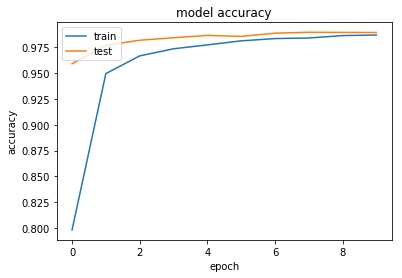

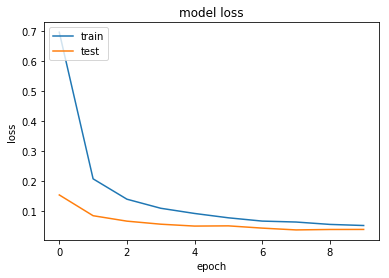

In [43]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

10000/10000 [==============================] - 1s 110us/step
Accuracy on test set = 0.9919


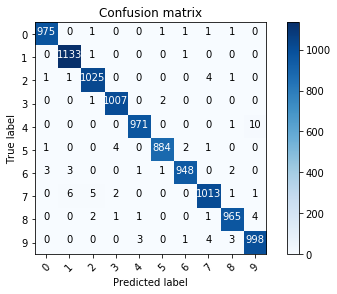

In [10]:
np.random.seed(1234) #set random seed for reproducibility

score = model.evaluate(x_test, y_test, verbose=VERBOSE)
print("Accuracy on test set =", score[1])

predicted = model.predict_classes(x_test)


# Look at confusion matrix 
#https://yashk2810.github.io/Applying-Convolutional-Neural-Network-on-the-MNIST-dataset/
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))




In [41]:
confusion_mtx

array([[ 975,    0,    1,    0,    0,    1,    1,    1,    1,    0],
       [   0, 1133,    1,    0,    0,    0,    1,    0,    0,    0],
       [   1,    1, 1025,    0,    0,    0,    0,    4,    1,    0],
       [   0,    0,    1, 1007,    0,    2,    0,    0,    0,    0],
       [   0,    0,    0,    0,  971,    0,    0,    0,    1,   10],
       [   1,    0,    0,    4,    0,  884,    2,    1,    0,    0],
       [   3,    3,    0,    0,    1,    1,  948,    0,    2,    0],
       [   0,    6,    5,    2,    0,    0,    0, 1013,    1,    1],
       [   0,    0,    2,    1,    1,    0,    0,    1,  965,    4],
       [   0,    0,    0,    0,    3,    0,    1,    4,    3,  998]],
      dtype=int64)

In [11]:
from sklearn.metrics import classification_report 
print(classification_report(Y_true, Y_pred_classes))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99       980
          1       0.99      1.00      0.99      1135
          2       0.99      0.99      0.99      1032
          3       0.99      1.00      1.00      1010
          4       0.99      0.99      0.99       982
          5       1.00      0.99      0.99       892
          6       0.99      0.99      0.99       958
          7       0.99      0.99      0.99      1028
          8       0.99      0.99      0.99       974
          9       0.99      0.99      0.99      1009

avg / total       0.99      0.99      0.99     10000



In [ ]:
np.random.seed(1234) #set random seed for reproducibility

score = model.evaluate(x_test, y_test, verbose=VERBOSE)
print("Accuracy on test set =", score[1])

predicted = model.predict_classes(x_test)


# Look at confusion matrix 
#https://yashk2810.github.io/Applying-Convolutional-Neural-Network-on-the-MNIST-dataset/
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix

# With Augmentation

In [44]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

train_generator = gen.flow(x_train, y_train, batch_size=64)
test_generator = test_gen.flow(x_test, y_test, batch_size=64)

with tf.device('/gpu:0'):
    model = model.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=30, 
                    validation_data=test_generator, validation_steps=10000//64)
    sess = tf.Session(config=tf.ConfigProto(
      allow_soft_placement=True, log_device_placement=True))
sess.close()


Epoch 1/30
937/937 [==============================] - 14s 15ms/step - loss: 0.0273 - acc: 0.9923 - val_loss: 0.0169 - val_acc: 0.9945
Epoch 2/30
937/937 [==============================] - 15s 16ms/step - loss: 0.0235 - acc: 0.9934 - val_loss: 0.0191 - val_acc: 0.9947
Epoch 3/30
937/937 [==============================] - 14s 15ms/step - loss: 0.0245 - acc: 0.9935 - val_loss: 0.0183 - val_acc: 0.9947
Epoch 4/30
937/937 [==============================] - 14s 15ms/step - loss: 0.0255 - acc: 0.9929 - val_loss: 0.0218 - val_acc: 0.9935
Epoch 5/30
937/937 [==============================] - 14s 15ms/step - loss: 0.0246 - acc: 0.9932 - val_loss: 0.0200 - val_acc: 0.9946
Epoch 6/30
937/937 [==============================] - 14s 15ms/step - loss: 0.0233 - acc: 0.9934 - val_loss: 0.0208 - val_acc: 0.9942
Epoch 7/30
937/937 [==============================] - 14s 15ms/step - loss: 0.0250 - acc: 0.9929 - val_loss: 0.0177 - val_acc: 0.9953
Epoch 8/30
937/937 [==============================] - 14s 15ms

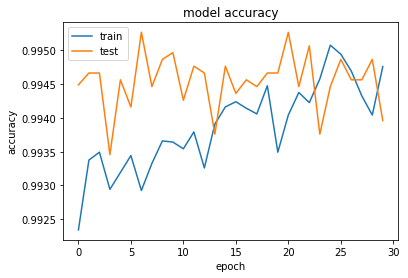

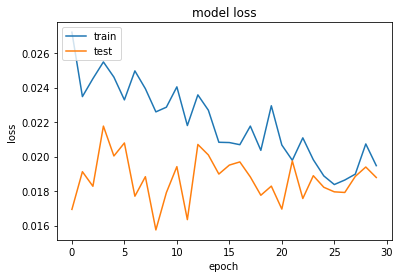

In [47]:
# summarize history for accuracy
plt.plot(model.history['acc'])
plt.plot(model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [51]:
np.random.seed(1234) #set random seed for reproducibility

score = model.model.evaluate(x_test, y_test, verbose=VERBOSE)
print("Accuracy on test set =", score[1])

predicted = model.model.predict_classes(x_test)


# Look at confusion matrix 
#https://yashk2810.github.io/Applying-Convolutional-Neural-Network-on-the-MNIST-dataset/
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix

10000/10000 [==============================] - 1s 108us/step
Accuracy on test set = 0.9944


In [53]:
np.random.seed(1234) #set random seed for reproducibility


kaggle = np.array(pd.read_csv('Kaggle Submissions/test.csv'))
#normalize by dividing by max value 
kaggle = kaggle/255
#Convert to support GPU computation (Deep Learning with Keras)
kaggle = kaggle.astype('float32')
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
kaggle = kaggle.reshape(-1,28,28,1)
# predict results
results = model.model.predict(kaggle)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("cnn_mnist3.15.csv",index=False)